# Assessment Title: Cycling 

Analyzing Ireland's Cycling Data and Comparing it with Mexico's

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

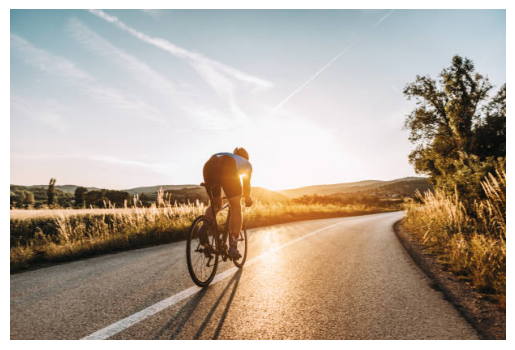

In [3]:
img = mpimg.imread('bike.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [2]:
#Importing main libraries
import seaborn as sns
import pandas as pd
import numpy as np

# DUBLIN 

Importing raw data

In [16]:
dublin1= pd.read_csv('dublin1.csv')
dublin2= pd.read_csv('dublin2.csv')

In [17]:
dublin1.head()

,system_id,last_reported,station_id,num_bikes_available,num_docks_available,is_installed,is_renting,is_returning,name,short_name,address,lat,lon,region_id,capacity
0,dublin_bikes,2024-05-02 19:00:00,109,10,18,True,True,True,BUCKINGHAM STREET LOWER,NaN,Buckingham Street Lower,53.353333,-6.249319,NaN,29
1,dublin_bikes,2024-05-02 19:00:00,110,22,18,True,True,True,PHIBSBOROUGH ROAD,NaN,Phibsborough Road,53.356308,-6.273717,NaN,40
2,dublin_bikes,2024-05-02 19:00:00,116,7,23,True,True,True,BROADSTONE,NaN,Broadstone,53.354700,-6.272314,NaN,30
3,dublin_bikes,2024-05-02 19:00:00,54,1,32,True,True,True,CLONMEL STREET,NaN,Clonmel Street,53.336020,-6.262980,NaN,33
4,dublin_bikes,2024-05-02 19:00:00,58,1,39,True,True,True,SIR PATRICK DUN'S,NaN,Sir Patrick's Dun,53.339220,-6.240642,NaN,40


In [18]:
dublin2.head()

,system_id,last_reported,station_id,num_bikes_available,num_docks_available,is_installed,is_renting,is_returning,name,short_name,address,lat,lon,region_id,capacity
0,dublin_bikes,6/1/2024 0:05,101,7,23,True,True,True,KING STREET NORTH,NaN,King Street North,53.350292,-6.273507,NaN,30
1,dublin_bikes,6/1/2024 0:05,102,16,24,True,True,True,WESTERN WAY,NaN,Western Way,53.354930,-6.269425,NaN,40
2,dublin_bikes,6/1/2024 0:05,106,2,38,True,True,True,RATHDOWN ROAD,NaN,Rathdown Road,53.358930,-6.280337,NaN,40
3,dublin_bikes,6/1/2024 0:05,107,6,34,True,True,True,CHARLEVILLE ROAD,NaN,Charleville Road,53.359158,-6.281866,NaN,40
4,dublin_bikes,6/1/2024 0:05,11,1,29,True,True,True,EARLSFORT TERRACE,NaN,Earlsfort Terrace,53.334293,-6.258503,NaN,30


## Using an API to extract the data

In [20]:
!pip install requests


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import requests
import json

In [22]:
api_key = '5c20182a11586d9a8e24446b2d69e8c33ff0948c'
contract_name = 'Irelandbikes'

In [23]:
# Defining the API URL
url = f'https://api.jcdecaux.com/vls/v1/stations?contract={contract_name}&apiKey={api_key}'

In [24]:
response = requests.get(url)

Since JCDecaux has different contracts in various locations around the world, to obtain accurate information, the contract locations must first be checked to access it.

In [25]:
# API's Key
api_key = '5c20182a11586d9a8e24446b2d69e8c33ff0948c'

# Defining URL 
contracts_url = f'https://api.jcdecaux.com/vls/v1/contracts?apiKey={api_key}'

contracts_response = requests.get(contracts_url)

# Checking if the request was successful
if contracts_response.status_code == 200:
    contracts_data = contracts_response.json()  # JSON format response
    # Contracts
    for contract in contracts_data:
        print(contract['name'])
else:
    print(f'Error: {contracts_response.status_code}')

rouen
jcdecauxbike
toulouse
luxembourg
dublin
valence
stockholm
santander
lund
maribor
bruxelles
lyon
amiens
lillestrom
mulhouse
ljubljana
seville
namur
nancy
creteil
cergy-pontoise
vilnius
toyama
marseille
nantes
brisbane
besancon


In [26]:
# Defining API and contract's name
api_key = '5c20182a11586d9a8e24446b2d69e8c33ff0948c'
contract_name = 'Dublin'

url = 'https://api.jcdecaux.com/vls/v1/stations'

# Making the request to the API
params = {
    'contract': contract_name,
    'apiKey': api_key
}

response = requests.get(url, params=params)

# Verification
if response.status_code == 200:
    data = response.json()
    for station in data[:5]:
        print(json.dumps(station, indent=2))
elif response.status_code == 400:
    print('Error 400: Bad request. Check the request parameters.')
    print('Error details:', response.json())
elif response.status_code == 403:
    print('Error 403: Forbidden. Check your API key.')
else:
    print(f'Error: {response.status_code}')

{
  "number": 42,
  "contract_name": "dublin",
  "name": "SMITHFIELD NORTH",
  "address": "Smithfield North",
  "position": {
    "lat": 53.349562,
    "lng": -6.278198
  },
  "banking": false,
  "bonus": false,
  "bike_stands": 30,
  "available_bike_stands": 10,
  "available_bikes": 20,
  "status": "OPEN",
  "last_update": 1721430135000
}
{
  "number": 30,
  "contract_name": "dublin",
  "name": "PARNELL SQUARE NORTH",
  "address": "Parnell Square North",
  "position": {
    "lat": 53.3537415547453,
    "lng": -6.26530144781526
  },
  "banking": false,
  "bonus": false,
  "bike_stands": 20,
  "available_bike_stands": 20,
  "available_bikes": 0,
  "status": "OPEN",
  "last_update": 1721430176000
}
{
  "number": 54,
  "contract_name": "dublin",
  "name": "CLONMEL STREET",
  "address": "Clonmel Street",
  "position": {
    "lat": 53.336021,
    "lng": -6.26298
  },
  "banking": false,
  "bonus": false,
  "bike_stands": 33,
  "available_bike_stands": 24,
  "available_bikes": 9,
  "status":

In [27]:
df = pd.DataFrame(data)
df.head()

,number,contract_name,name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update
0,42,dublin,SMITHFIELD NORTH,Smithfield North,"{'lat': 53.349562, 'lng': -6.278198}",False,False,30,10,20,OPEN,1721430135000
1,30,dublin,PARNELL SQUARE NORTH,Parnell Square North,"{'lat': 53.3537415547453, 'lng': -6.2653014478...",False,False,20,20,0,OPEN,1721430176000
2,54,dublin,CLONMEL STREET,Clonmel Street,"{'lat': 53.336021, 'lng': -6.26298}",False,False,33,24,9,OPEN,1721430031000
3,108,dublin,AVONDALE ROAD,Avondale Road,"{'lat': 53.359405, 'lng': -6.276142}",False,False,35,21,14,OPEN,1721430265000
4,20,dublin,JAMES STREET EAST,James Street East,"{'lat': 53.336597, 'lng': -6.248109}",False,False,30,29,1,OPEN,1721430147000


In [28]:
print(df.describe())

           number  bike_stands  available_bike_stands  available_bikes  \
count  114.000000   114.000000             114.000000       114.000000   
mean    58.824561    31.982456              19.798246        11.456140   
std     34.266071     7.490386              12.091231        10.205968   
min      1.000000    16.000000               0.000000         0.000000   
25%     29.250000    29.000000               9.250000         3.000000   
50%     58.500000    30.000000              20.000000         9.000000   
75%     88.750000    40.000000              29.750000        18.000000   
max    117.000000    40.000000              40.000000        39.000000   

        last_update  
count  1.140000e+02  
mean   1.721430e+12  
std    1.414322e+05  
min    1.721430e+12  
25%    1.721430e+12  
50%    1.721430e+12  
75%    1.721430e+12  
max    1.721430e+12  


In [29]:
top_bike_stations = df.sort_values(by='available_bikes', ascending=False).head(10)
print(top_bike_stations[['name', 'available_bikes']])

                           name  available_bikes
110                  EMMET ROAD               39
76    HEUSTON STATION (CENTRAL)               39
50                TALBOT STREET               38
111      HEUSTON BRIDGE (NORTH)               36
89              PARKGATE STREET               32
73   HEUSTON STATION (CAR PARK)               31
22      COLLINS BARRACKS MUSEUM               30
62              KILMAINHAM LANE               30
40              KILMAINHAM GAOL               29
15          FOWNES STREET UPPER               28


In [30]:
display(df)

,number,contract_name,name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update
0,42,dublin,SMITHFIELD NORTH,Smithfield North,"{'lat': 53.349562, 'lng': -6.278198}",False,False,30,10,20,OPEN,1721430135000
1,30,dublin,PARNELL SQUARE NORTH,Parnell Square North,"{'lat': 53.3537415547453, 'lng': -6.2653014478...",False,False,20,20,0,OPEN,1721430176000
2,54,dublin,CLONMEL STREET,Clonmel Street,"{'lat': 53.336021, 'lng': -6.26298}",False,False,33,24,9,OPEN,1721430031000
3,108,dublin,AVONDALE ROAD,Avondale Road,"{'lat': 53.359405, 'lng': -6.276142}",False,False,35,21,14,OPEN,1721430265000
4,20,dublin,JAMES STREET EAST,James Street East,"{'lat': 53.336597, 'lng': -6.248109}",False,False,30,29,1,OPEN,1721430147000
...,...,...,...,...,...,...,...,...,...,...,...,...
109,39,dublin,WILTON TERRACE,Wilton Terrace,"{'lat': 53.332383, 'lng': -6.252717}",False,False,20,17,3,OPEN,1721430122000
110,83,dublin,EMMET ROAD,Emmet Road,"{'lat': 53.340714, 'lng': -6.308191}",False,False,40,1,39,OPEN,1721430017000
111,92,dublin,HEUSTON BRIDGE (NORTH),Heuston Bridge (North),"{'lat': 53.347802, 'lng': -6.292432}",False,False,40,4,36,OPEN,1721430012000
112,21,dublin,LEINSTER STREET SOUTH,Leinster Street South,"{'lat': 53.34218, 'lng': -6.254485}",False,False,30,21,9,OPEN,1721429960000


In [31]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import folium

def create_station_map(df):
    # Create a map centered on Dublin
    dublin_map = folium.Map(location=[53.3498, -6.2603], zoom_start=13)
    
    # Iterate over the rows of the DataFrame and add markers to the map
    for index, row in df.iterrows():
        # Get the position (latitude and longitude) of each station
        lat = row['position']['lat']
        lng = row['position']['lng']
        station_name = row['name']
        
        # Add a marker to the map
        folium.Marker([lat, lng], popup=station_name).add_to(dublin_map)
    
    # Display the map in Jupyter Notebook
    display(dublin_map)

# Assuming you already have the DataFrame df defined
create_station_map(df)

# NEW YORK

In [9]:
ny1 = pd.read_csv('NY1.csv')
ny2 = pd.read_csv('NY2.csv')
ny3 = pd.read_csv('NY3.csv')

C:\Users\mara_\AppData\Local\Temp\ipykernel_35680\3495023063.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ny1 = pd.read_csv('NY1.csv')
C:\Users\mara_\AppData\Local\Temp\ipykernel_35680\3495023063.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  ny2 = pd.read_csv('NY2.csv')
C:\Users\mara_\AppData\Local\Temp\ipykernel_35680\3495023063.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  ny3 = pd.read_csv('NY3.csv')


In [10]:
ny1.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A38B171B6C31691A,electric_bike,2024-06-12 17:47:23.952,2024-06-12 17:50:27.312,E 89 St & 3 Ave,7265.10,1 Ave & E 94 St,7286.05,40.780499,-73.952185,40.781721,-73.945940,member
1,77E13C9D6559EA56,electric_bike,2024-06-04 16:48:42.876,2024-06-04 17:01:46.672,Pier 40 - Hudson River Park,5696.03,W 25 St & 9 Ave,6339.06,40.728060,-74.011184,40.747833,-74.000572,member
2,EA6418AD826D19D9,electric_bike,2024-06-01 13:36:28.502,2024-06-01 13:52:55.912,W 44 St & 5 Ave,6551.02,E 75 St & 3 Ave,6991.12,40.754621,-73.980641,40.771129,-73.957723,member


In [11]:
ny2.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0B2D664B7AC16952,electric_bike,2024-06-14 14:57:26.042,2024-06-14 15:09:16.817,E 33 St & 5 Ave,6322.01,E 56 St & 3 Ave,6691.11,40.747740,-73.984796,40.759345,-73.967597,member
1,D69260587B96B235,electric_bike,2024-06-03 17:33:07.804,2024-06-03 17:39:59.596,W 116 St & Broadway,7713.11,W 87 St & West End Ave,7484.05,40.808195,-73.964575,40.789622,-73.977570,member
2,9E1DA1BA971D7DB9,electric_bike,2024-06-01 16:05:57.549,2024-06-01 16:27:06.375,E 11 St & 3 Ave,5788.16,Broadway & Berry St,5164.05,40.731088,-73.987995,40.710361,-73.965304,member


In [12]:
ny3.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,86095C1018782AB5,classic_bike,2024-06-08 15:03:44.426,2024-06-08 15:09:00.448,W 30 St & 8 Ave,6373.07,5 Ave & E 30 St,6248.08,40.749653,-73.995208,40.745985,-73.986295,casual
1,E9D977234640B575,electric_bike,2024-06-14 16:07:57.080,2024-06-14 16:24:08.686,W 34 St & Hudson Blvd E,6535.04,Albany St & Greenwich St,5145.02,40.755298,-74.000993,40.709267,-74.013247,member
2,23E01F4BC5B745F5,electric_bike,2024-06-13 15:57:58.679,2024-06-13 16:08:20.968,Columbia St & Lorraine St,4013.08,State St & Smith St,4522.07,40.674886,-74.007453,40.689170,-73.988600,member


# MEXICO CITY

In [13]:
mexico = pd.read_csv('mexico.csv')
mexico.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,M,28.0,5115456,189,31/05/2024,23:32:18,189,1/6/2024,0:00:01
1,M,39.0,4745980,257,31/05/2024,23:54:26,31,1/6/2024,0:00:01
2,F,21.0,7038698,270,31/05/2024,23:46:19,482,1/6/2024,0:00:02
3,M,28.0,5962402,268-269,31/05/2024,23:40:10,51,1/6/2024,0:00:03
4,M,32.0,2126456,299,31/05/2024,23:44:20,66,1/6/2024,0:00:04


In [14]:
mexico.columns.tolist()

['Genero_Usuario',
 'Edad_Usuario',
 'Bici',
 'Ciclo_Estacion_Retiro',
 'Fecha_Retiro',
 'Hora_Retiro',
 'Ciclo_EstacionArribo',
 'Fecha Arribo',
 'Hora_Arribo']

In [15]:
mexico.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,M,28.0,5115456,189,31/05/2024,23:32:18,189,1/6/2024,0:00:01
1,M,39.0,4745980,257,31/05/2024,23:54:26,31,1/6/2024,0:00:01
2,F,21.0,7038698,270,31/05/2024,23:46:19,482,1/6/2024,0:00:02
3,M,28.0,5962402,268-269,31/05/2024,23:40:10,51,1/6/2024,0:00:03
4,M,32.0,2126456,299,31/05/2024,23:44:20,66,1/6/2024,0:00:04
